## Model performance sheet

Below are the metrics for my model. \
It was a Pytorch Convolutional network.

This report outputs, precision, recall, accuracy, and the F-1 score. As well as a plot of the ROC curve. 

Binary accuracy is the % of predictions the model gets right. \
given by: $\frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$ 

Precision is the ratio of true positive to true positive + false positive predictions. \
given by: $\frac{True Positive }{True Positive + False Positive}$ 

Recall is how often the model correctly identifies the truly positive class.\
given by:$\frac{True Positive }{True Positive + False Negative}$ 


The F1 score is $2 * \frac{Precision * Recall}{Precision +Recall}$ 


In [25]:
!pip install torch==2.0.0 torchvision==0.15.1 torchaudio==2.0.1 --quiet
!pip install torchsummary --quiet
!pip install pydicom --quiet
import warnings
warnings.filterwarnings("ignore")


In [4]:
! pip install torcheval --quiet

In [5]:
import os
import numpy as np
import pandas as pd
import shutil
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn as nn
import torch.nn.functional as F

import torch
import torchvision
#from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
from torchsummary import summary

In [6]:
pathy='/sbgenomics/project-files/Agnes_McFarlin_Tier1_Submission/challenge_data/Transformed_Data'

In [7]:
#The below chunks make little data frames of all of the files we just split up. 
#For training

starter_path=(pathy+"/train/")
data_labels_tr=[]
next_path= os.listdir(starter_path)

#after_that = os.path.join(starter_path,next_path[0])
#now_test= os.listdir(after_that)
for i in next_path:
    impath=(os.path.join(starter_path,i))
    data_labels_tr.append(i)

In [8]:
#The below chunks make little data frames of all of the files we just split up. 
#For validation
starter_path=(pathy+"/val/")
data_labels_val=[]
next_path= os.listdir(starter_path)

#after_that = os.path.join(starter_path,next_path[0])
#now_test= os.listdir(after_that)
for i in next_path:
    impath=(os.path.join(starter_path,i))
    data_labels_val.append(i)

In [9]:
#The below chunks make little data frames of all of the files we just split up. 
#For testing
starter_path=(pathy+"/test/")
data_labels_tst=[]
next_path= os.listdir(starter_path)

#after_that = os.path.join(starter_path,next_path[0])
#now_test= os.listdir(after_that)
for i in next_path:
    impath=(os.path.join(starter_path,i))
    data_labels_tst.append(i)

In [10]:
partial_string = '_Y'

xy3=pd.DataFrame(data_labels_tst)

xy3['status'] = xy3[0].str.contains(partial_string).astype(int)

xy3.columns=['id','status']

In [11]:

xy3.to_csv("test_labels_final.csv",index=False)

In [12]:
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [13]:
from PIL import Image
import pydicom
import torch
import numpy as np
import torchvision.transforms as T


from PIL import Image
import torch

import torchvision.transforms as T

device = torch.device('cpu') 

sample_image = Image.open(os.getcwd()+"/_X000b2a59-e982-4802-9d3d-b55c199d762a.dcm.jpg")
img_transforms = T.Compose([
                                     T.Resize((512,512), interpolation=2),
                                     T.RandomHorizontalFlip(p=0.5),
                                     T.ToTensor()])
img_tensor = img_transforms(sample_image) 
#x = img_tensor.to(device=device)

#transform = T.Compose(
    #[T.Resize((32,32), interpolation=2),T.ToTensor(),
     #T.Normalize((0.5,), (0.5,))])

In [14]:
import torch
from torch.utils.data import Dataset

from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
import pandas as pd
import numpy as np



control_dir =pathy+"/test"

class Loading_test(Dataset):
    
    def __init__(self):
        """Trying to load jpeg transformed Dicam files.
        """
        #Define dataset
        overall_dataset_dir = control_dir
        self.selected_dataset_dir = os.path.join(os.path.join(pathy+'//test'))
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/test_labels_final.csv'))
        self.label_meanings = self.all_labels.columns.values.tolist()
        
    def __len__(self):
        """
        Weird"""
        return len(self.all_filenames)
        
    def __getitem__(self, idx):
        """The IDX function is built in to Pytorch. Pretty Cool I think.
        And then I use the above image transforms function"""
        selected_filename = self.all_filenames[idx]
        #print(selected_filename)
        imagepil = Image.open(os.path.join(self.selected_dataset_dir,selected_filename))
        
        image = img_transforms(imagepil)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd()+'/test_labels_final.csv'))
        label= self.all_labels['status'][idx]
       
        
        sample = {'data':image, #preprocessed image, for input into NN
                  'label':label,
                  'img_idx':idx, 'sample_name':selected_filename}
        return(sample)

In [15]:
test1=Loading_test()

In [16]:
from torch.utils.data import DataLoader
batch_size=30
test_dataloader = DataLoader(test1, batch_size=batch_size, shuffle=True)

In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.conv = nn.Sequential(
        nn.Conv2d(1, 20, kernel_size = (3,3), padding=1),
        nn.Conv2d(20, 10, kernel_size = (3,3), padding=1),
        torch.nn.BatchNorm2d(10),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(10, 5, kernel_size = (3,3), padding=1),
        nn.Conv2d(5, 4, kernel_size = (3,3), padding=1),
        torch.nn.BatchNorm2d(4), # the norm layer takes the output (so in this case 4 from above)
        #nn.ReLU(inplace=True),
        nn.LeakyReLU(inplace=True),
        nn.Dropout(p=0.2),
        torch.nn.MaxPool2d((2, 2)), # so this shrinks from 512 to 256 
        nn.Conv2d(4, 3, kernel_size = (3,3), padding=1),
        nn.Dropout(p=0.2), 
        torch.nn.MaxPool2d((2, 2)),    # Max pooling the model reducing inputs from 256 to 128 
        nn.Conv2d(3, 2, kernel_size = (3,3), padding=1),
        torch.nn.MaxPool2d((2, 2)), # so this shrinks from 128 to 64
        torch.nn.BatchNorm2d(2))
        #nn.Conv2d(3, 2, kernel_size = (3,3), padding=1),
        #torch.nn.MaxPool2d((2, 2))) # This shrinks to 64
        self.fc = nn.Linear(in_features=8192,out_features=1) # For the linear stuff It is last conv2d shape * input dim*input dim
        # Basically (2*128*128)
        #self.fc1 = nn.Linear(in_features=batch_size,out_features=batch_size)

    def forward(self, x):
        x= self.conv(x)
        #x = F.max_pool2d(F.relu(self.conv(x)),4,4)
        #x = F.max_pool2d(F.relu(self.conv1(x)),2,2)
        #x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = torch.flatten(x,start_dim=1,end_dim=-1)
        
        x=self.fc(x)

        
       # x=self.fc1(x)
        return x


model = Modelo()

\newpage

### Model Summary

In [18]:
print("Model Architecture:",model)

Model Architecture: Modelo(
  (conv): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Conv2d(5, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.01, inplace=True)
    (8): Dropout(p=0.2, inplace=False)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(4, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Dropout(p=0.2, inplace=False)
    (12): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (13): Conv2d(3, 2, kern

In [57]:
from torchvision import models
from torchsummary import summary


print(summary(model, (1, 512, 512)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 20, 512, 512]             200
            Conv2d-2         [-1, 10, 512, 512]           1,810
       BatchNorm2d-3         [-1, 10, 512, 512]              20
         LeakyReLU-4         [-1, 10, 512, 512]               0
            Conv2d-5          [-1, 5, 512, 512]             455
            Conv2d-6          [-1, 4, 512, 512]             184
       BatchNorm2d-7          [-1, 4, 512, 512]               8
         LeakyReLU-8          [-1, 4, 512, 512]               0
           Dropout-9          [-1, 4, 512, 512]               0
        MaxPool2d-10          [-1, 4, 256, 256]               0
           Conv2d-11          [-1, 3, 256, 256]             111
          Dropout-12          [-1, 3, 256, 256]               0
        MaxPool2d-13          [-1, 3, 128, 128]               0
           Conv2d-14          [-1, 2, 1

This model is not overly gigantic. 
\newpage

In [36]:
import torch.nn.functional as F
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.000010)

In [37]:
PATH = 'model44.pt'

In [38]:

from torcheval.metrics.functional import binary_accuracy
from sklearn import metrics
from sklearn.metrics import roc_curve
from torcheval.metrics.functional.classification import binary_recall
from torcheval.metrics.functional import binary_accuracy
from sklearn import metrics
from sklearn.metrics import roc_curve

In [39]:

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
accuracy10=[]
from torcheval.metrics.functional.aggregation.auc import auc
from torcheval.metrics.functional import binary_precision
from torcheval.metrics.functional import binary_accuracy
from sklearn.metrics import accuracy_score
from sklearn import metrics
from torcheval.metrics.functional import binary_f1_score
for i, batch in enumerate(test_dataloader):
    model.eval()
    data,label = batch['data'],batch['label']
    data.to(device)
    label.to(device)
    test_logits,label=(model(data),label)
    test_logits = test_logits.squeeze()
    test_pred=torch.sigmoid(test_logits)
    test_pred1=test_pred.squeeze(-1).detach().numpy()
    #print(test_pred1)
    fpr, tpr, threshold = roc_curve(label.float(), test_pred1)
    #roc_auc = auc(fpr, tpr)
    #print(accuracy_score(label, test_pred1))
    #test_pred=torch.round(test_pred)
    ##test_pred_1= test_pred.detach().numpy()
    ##nn_fpr, nn_tpr, nn_thresholds = roc_curve(label, y_score)
    ##test_true=label
    #print(label)
    #print(auc(test_pred, test_true, reorder=True))
    arfs=binary_accuracy(test_pred, label, threshold=0.7)
    test_pred2=arfs.detach().numpy()
    ats=binary_recall(test_pred, label, threshold=0.61)
    bin_rec=ats.detach().numpy()
    f1_score=binary_f1_score(test_pred, label, threshold=0.61)
    f1_rec=f1_score.detach().numpy()
    prec1=binary_precision(test_pred, label, threshold=0.61)
    prec_scr=prec1.detach().numpy()
    accuracy10.append([test_pred2,bin_rec,f1_rec,prec_scr])

In [40]:
ahh=pd.DataFrame(accuracy10)

### Results

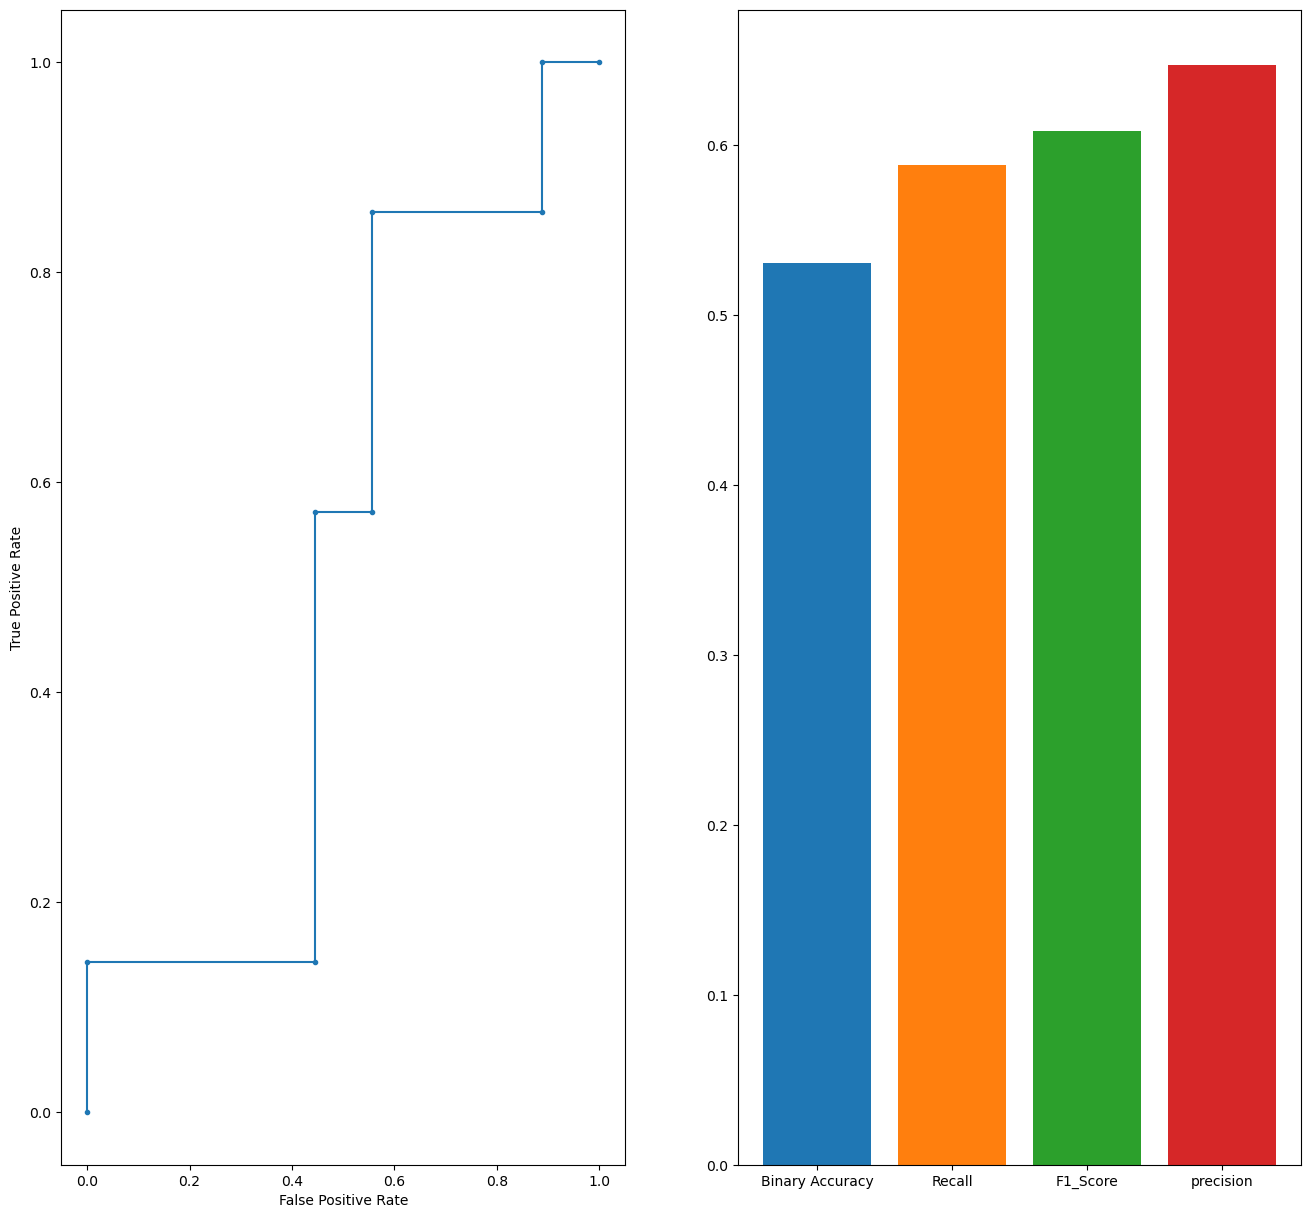

In [41]:
from matplotlib import pyplot as plt
f,ax= plt.subplots(figsize=(16,15))
plt.subplot(1,2,1)
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
ax.set_axis_off()

plt.subplot(1,2,2)
x=['Binary Accuracy','Recall','F1_Score','precision']
y=[np.mean(ahh[0]),np.mean(ahh[1]),np.mean(ahh[2]),np.mean(ahh[3])]
plt.bar(x[0],y[0], label='Binary Accuracy')
plt.bar(x[1],y[1],label='Recall')
plt.bar(x[2],y[2],label='F1_Score')
plt.bar(x[3],y[3],label='precision')
plt.show()
ax.set_axis_off()

In [42]:
print("Metrics","\n","Accuracy",np.mean(ahh[0]),'\n',"Recall",np.mean(ahh[1]),'\n',"F-1 Score", np.mean(ahh[2]),'\n',"Precision",np.mean(ahh[3]))

Metrics 
 Accuracy 0.5305555661519369 
 Recall 0.5879966815312704 
 F-1 Score 0.6082125902175903 
 Precision 0.6471310456593832


In [27]:
!pip install nbconvert --quiet


In [59]:
!jupyter nbconvert  --no-input --to PDF  --no-prompt ml_model.ipynb

[NbConvertApp] Converting notebook ml_model.ipynb to PDF
[NbConvertApp] Support files will be in ml_model_files/
[NbConvertApp] Making directory ./ml_model_files
[NbConvertApp] Writing 24660 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 59065 bytes to ml_model.pdf


In [19]:
directory='/sbgenomics/output-files/'
import shutil
import os
file='ml_model.ipynb.pdf'
abc=(os.path.join(directory,"/"+ 'ml_model.ipynb.pdf')) #<- get the first file name
path = os.getcwd()
moveto =directory
src = path
dst = moveto
try:
    shutil.move(src+"/"+file,dst)
    
except OSError:
    pass